# Exercise 7: Reading and saving video and working with various video inputs such as CCTV cameras and webcams

In [17]:
pip install opencv-python numpy


Note: you may need to restart the kernel to use updated packages.



### ✅ **Use Case**

This code is useful for **real-time video enhancement**, allowing users to visually explore the effect of gamma correction on webcam footage — particularly beneficial for improving visibility in low-light environments.

In [ ]:
import cv2
import numpy as np

# تابع برای اعمال تصحیح گاما
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# مقدار گاما (می‌توانید این مقدار را تغییر دهید)
gamma = 2.0  # گاما > 1 روشنایی را افزایش می‌دهد، گاما < 1 آن را کاهش می‌دهد

# دسترسی به وبکم
cap = cv2.VideoCapture(0)

# بررسی اینکه وبکم به درستی باز شده است
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # خواندن فریم از وبکم
    ret, frame = cap.read()
    
    # بررسی موفقیت‌آمیز بودن خواندن فریم
    if not ret:
        print("Error: Could not read frame.")
        break

    # برعکس کردن تصویر (flip افقی)
    flipped = cv2.flip(frame, 1)
    
    # اعمال تصحیح گاما روی فریم
    gamma_corrected = adjust_gamma(flipped, gamma=gamma)
    
    # نمایش فریم اصلی و فریم اصلاح‌شده
    cv2.imshow('Webcam Original', flipped)
    cv2.imshow('Webcam Gamma Corrected', gamma_corrected)
    
    # بررسی فشردن کلید 'q' برای خروج
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# آزادسازی منابع و بستن پنجره‌ها
cap.release()
cv2.destroyAllWindows()


### 📌 Code Description – Gamma Correction on Live Webcam Feed

This Python script captures live video from a webcam, applies **gamma correction** to each frame to adjust its brightness, and displays both the original and corrected frames in real time.

---

### 🔧 **Detailed Functionality**

1. **Gamma Correction Function** (`adjust_gamma`):
   - Applies a nonlinear transformation to pixel values to control image brightness.
   - The gamma value can be adjusted by the user:
     - **Gamma > 1** → Increases brightness
     - **Gamma < 1** → Decreases brightness

2. **Video Capture**:
   - The webcam is accessed using `cv2.VideoCapture(0)`.
   - The script checks if the webcam is opened successfully.

3. **Frame Processing Loop**:
   - Continuously reads frames from the webcam.
   - Each frame is **horizontally flipped** for a mirror-like view.
   - Gamma correction is applied to the flipped frame.
   - Both the original (flipped) and gamma-corrected frames are displayed in separate windows.

4. **Exit Mechanism**:
   - The loop continues until the user presses the `'q'` key.
   - Upon exit, the webcam is released and all OpenCV windows are closed.

---



### 🎥 Gamma Correction and Frame Display using Matplotlib

This script captures a **single frame** from the webcam, applies **horizontal flipping** and **gamma correction**, then displays both the original and corrected images using `matplotlib`.

---

### 🔍 **Key Steps Explained**

1. **Frame Capture**
   - The webcam is accessed using `cv2.VideoCapture(0)`.
   - A single frame is captured from the video stream.

2. **Image Processing**
   - The frame is flipped horizontally to simulate a mirror view.
   - Gamma correction is applied using a nonlinear transformation to adjust brightness.

3. **Visualization with `matplotlib`**
   - Both the original (flipped) and gamma-corrected frames are displayed side-by-side using `matplotlib.pyplot`.

4. **Optional Screenshot Saving**
   - The gamma-corrected image can be saved to disk using `plt.imsave()` or `cv2.imwrite()` if desired.

---

### ✅ **Why Use This?**

This script is perfect for:
- Previewing gamma correction effects without running a continuous video stream
- Analyzing the impact of gamma values in low-light conditions
- Capturing and saving a single enhanced frame from a webcam for further processing

---

> 📝 Tip: Gamma correction is especially useful when working with images or videos taken in environments with uneven or low lighting.



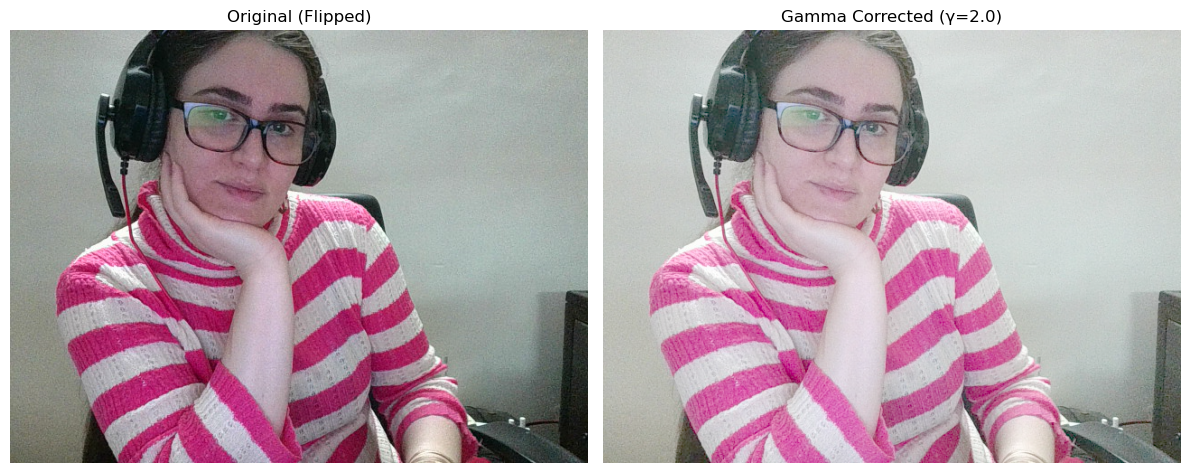

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# تابع تصحیح گاما
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([
        ((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)
    ]).astype("uint8")
    return cv2.LUT(image, table)

# مقدار گاما
gamma = 2.0

# دسترسی به وبکم
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    ret, frame = cap.read()
    cap.release()

    if ret:
        # برعکس کردن فریم
        flipped = cv2.flip(frame, 1)

        # اعمال گاما
        gamma_corrected = adjust_gamma(flipped, gamma=gamma)

        # تبدیل رنگ برای matplotlib (BGR → RGB)
        flipped_rgb = cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)
        corrected_rgb = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

        # نمایش با matplotlib
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original (Flipped)")
        plt.imshow(flipped_rgb)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Gamma Corrected (γ={gamma})")
        plt.imshow(corrected_rgb)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # ذخیره‌ی فریم اصلاح‌شده در صورت نیاز
        cv2.imwrite("gamma_corrected_frame.png", gamma_corrected)
    else:
        print("Error: Could not read frame.")


# This Python script processes video input from various sources and applies gamma correction to enhance the brightness or contrast of the frames. The corrected video is displayed in real time and saved to a local file. Here's a breakdown of its features:



In [18]:
import cv2
import numpy as np
import os

# تابع تصحیح گاما
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([
        ((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)
    ]).astype("uint8")
    return cv2.LUT(image, table)

# ----------- تنظیمات ورودی و خروجی -----------
# انتخاب منبع ویدیو:
#   برای وبکم داخلی: source = 0
#   برای فایل ویدیو: source = 'video.mp4'
#   برای دوربین مداربسته RTSP یا HTTP: source = 'rtsp://...' یا 'http://...'
source = 0  # یا 'sample_video.mp4' یا آدرس IP

# مقدار گاما
gamma = 2.0

# مسیر خروجی ویدیو اصلاح‌شده
output_filename = "output_gamma_corrected.avi"

# --------------------------------------------

# باز کردن منبع ویدیو
cap = cv2.VideoCapture(source)

if not cap.isOpened():
    print("Error: Could not open video source.")
    exit()

# خواندن ابعاد و نرخ فریم برای ذخیره‌سازی
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
if fps == 0 or np.isnan(fps):  # در برخی منابع ممکن است FPS صفر باشد
    fps = 25  # مقدار پیش‌فرض

# آماده‌سازی شیء ویدیونویس
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))

print("[INFO] Press 'q' to quit.")
while True:
    ret, frame = cap.read()
    if not ret:
        print("[INFO] Video ended or cannot fetch frame.")
        break

    # اصلاح گاما و فلیپ (اختیاری)
    flipped = cv2.flip(frame, 1)
    gamma_corrected = adjust_gamma(flipped, gamma=gamma)

    # نمایش فریم
    cv2.imshow("Gamma Corrected Video", gamma_corrected)

    # ذخیره فریم اصلاح‌شده در فایل خروجی
    out.write(gamma_corrected)

    # خروج با فشردن q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# آزادسازی منابع
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"[INFO] Video saved to: {os.path.abspath(output_filename)}")


[INFO] Press 'q' to quit.
[INFO] Video saved to: C:\Users\Matin\output_gamma_corrected.avi


# ### ✅ Key Features of the Gamma Correction Video Script

This Python script processes a video stream (from various sources), applies **gamma correction** to adjust brightness, displays the frames in real-time, and saves the enhanced video to a file.

---

### 📌 **Main Functionalities**

1. **🎥 Video Input from Multiple Sources**
   - Internal webcam (`0`)
   - Local video file (e.g., `'video.mp4'`)
   - IP camera or CCTV stream (e.g., `rtsp://...` or `http://...`)

2. **🌈 Gamma Correction**
   - Enhances image brightness or contrast using nonlinear transformation.
   - Adjustable via the `gamma` parameter:
     - `gamma > 1`: Brightens the image
     - `gamma < 1`: Darkens the image

3. **🖼️ Real-Time Frame Display**
   - Shows the processed frames live using OpenCV windows.
   - Includes optional horizontal flipping for mirror-like webcam view.

4. **💾 Saving Corrected Video**
   - Outputs the gamma-corrected video to a file using a configurable codec (`.avi` or `.mp4`).
   - Automatically adapts to input frame size and FPS.

---

### 📌 Use Case Example

This script is ideal for:
- Real-time video enhancement from webcams or surveillance systems
- Preprocessing videos under poor lighting conditions
- Capturing and saving improved video streams for later analysis

---

> 💡 **Tip:** Gamma correction is widely used in image processing and computer vision to improve visual quality, especially in low-light or high-contrast environments.
